# **Preprocess**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import matplotlib as mpl
import numpy as np
import math
import random
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from random import randint

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Tubes /ml/used_cars.csv')

Data Exploration

In [0]:
# Count the number of records — is this what you expected?
print(df.shape)

# What are the datatypes? Will you need to change these for a machine learning
# model?
df.dtypes

# Look for missing values — how should you deal with these?
print(df.isnull().sum())  

print(df.describe())

(20001, 26)
Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64
         Unnamed: 0            id  ...           lat          long
count  20001.000000  2.000100e+04  ...  18970.000000  18970.000000
mean   10000.000000  7.043199e+09  ...     40.394737    -86.300395
std     5773.935703  4.668820e+06  ...      4.440290     18.219242
min        0.000000  7.032597e+09  ...    -51.812200   -155.901000
25%     5000.000000  7.040114e+09  ...     37.273700    -80.166800
5

In [0]:
sns.distplot(df[df[''].notnull()][''], kde=False, bins=10);

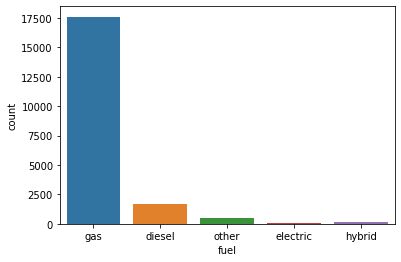

In [0]:
sns.countplot(x = 'fuel', data = df)

# Cleansing

no cleansing

In [0]:
import copy
ndf = copy.copy(df)

In [0]:
ndf.isnull().sum() 

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64

In [0]:
ndf['year'] = ndf['year'].fillna(0)
ndf['manufacturer'] = ndf['manufacturer'].fillna('noclue')
ndf['model'] = ndf['model'].fillna('noclue')
ndf['condition'] = ndf['condition'].fillna('noclue')
ndf['cylinders'] = ndf['cylinders'].fillna('noclue')
ndf['fuel'] = ndf['fuel'].fillna('noclue')
ndf['odometer'] = ndf['odometer'].fillna(0)
ndf['title_status'] = ndf['title_status'].fillna('noclue')
ndf['transmission'] = ndf['transmission'].fillna('noclue')
ndf['vin'] = ndf['vin'].fillna('noclue')
ndf['drive'] = ndf['drive'].fillna('noclue')
ndf['size'] = ndf['size'].fillna('noclue')
ndf['type'] = ndf['type'].fillna('noclue')
ndf['paint_color'] = ndf['paint_color'].fillna('noclue')
ndf['lat'] = ndf['lat'].fillna(0)
ndf['long'] = ndf['long'].fillna(0)
ndf = ndf.drop(['county'], axis=1)


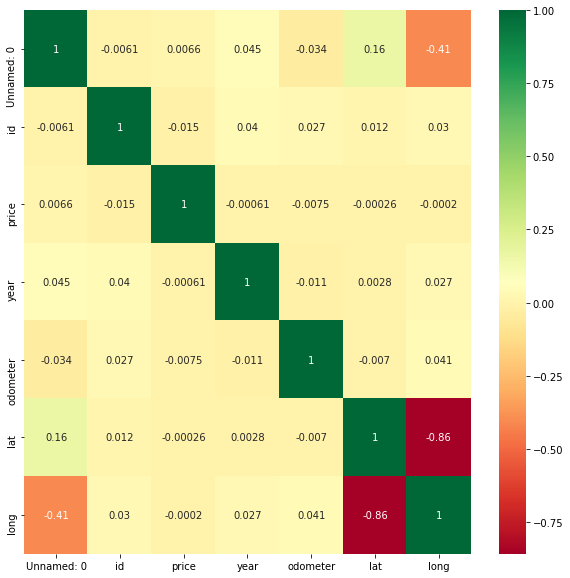

In [0]:
#Correlation Matrix with Heat Map
corrmat = ndf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(ndf.corr(),annot=True,cmap="RdYlGn")

the process for this dataset ends here

In [0]:
# -----------------------------------------------------------

cleansing

In [0]:
df.isnull().sum()

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64

In [0]:
df['year'] = df['year'].fillna(df['year'].mean())
df['price']=df['price'].mask(df['price']==0).fillna(df['price'].mean())
df.loc[df['price'] == 0, 'price'] = df['price'].mean()
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['lat']=df['lat'].fillna(method='bfill')
df['long']=df['long'].fillna(method='bfill')

In [0]:
new = df.filter(['manufacturer','model','condition','cylinders','fuel','title_status','transmission','vin','drive','size','type','paint_color'], axis=1)

In [0]:
# imp = SimpleImputer(strategy="constant")
imp = SimpleImputer(strategy="most_frequent")
a = imp.fit_transform(new)
a = pd.DataFrame(a)

In [0]:
df['manufacturer'] = a[0]
df['model'] = a[1]
df['condition'] = a[2]
df['cylinders'] = a[3]
df['fuel'] = a[4]
df['title_status'] = a[5]
df['transmission'] = a[6]
df['vin'] = a[7]
df['drive'] = a[8]
df['size'] = a[9]
df['type'] = a[10]
df['paint_color'] = a[11]
df = df.drop(['county'], axis=1)

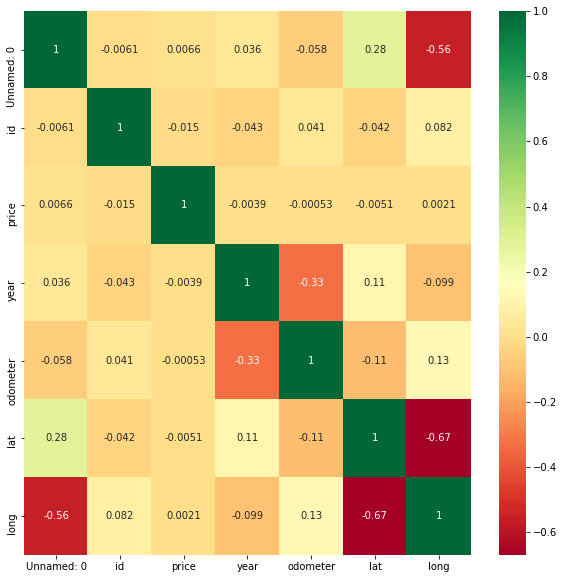

In [0]:
#Correlation Matrix with Heat Map

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

outliars

<Figure size 500x500 with 0 Axes>

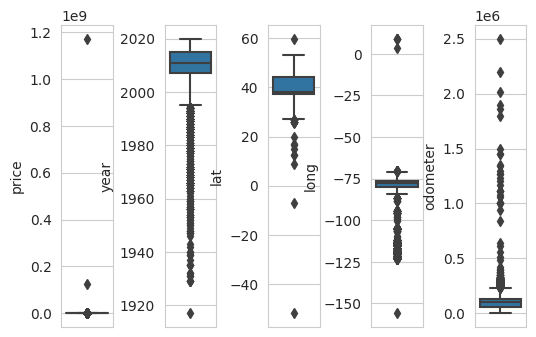

In [0]:
# Search for outliers — are there anomalies in your data? Are all values valid (e.g.
# no ages less than 0)?


mpl.rcParams['figure.dpi'] = 150

sns.set_style("whitegrid")

mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 5)
sns.boxplot(y=df["price"], ax=axes[0])
sns.boxplot(y=df["year"], ax=axes[1])
sns.boxplot(y=df["lat"], ax=axes[2])
sns.boxplot(y=df["long"], ax=axes[3])
sns.boxplot(y=df["odometer"], ax=axes[4])
plt.subplots_adjust(wspace=1)

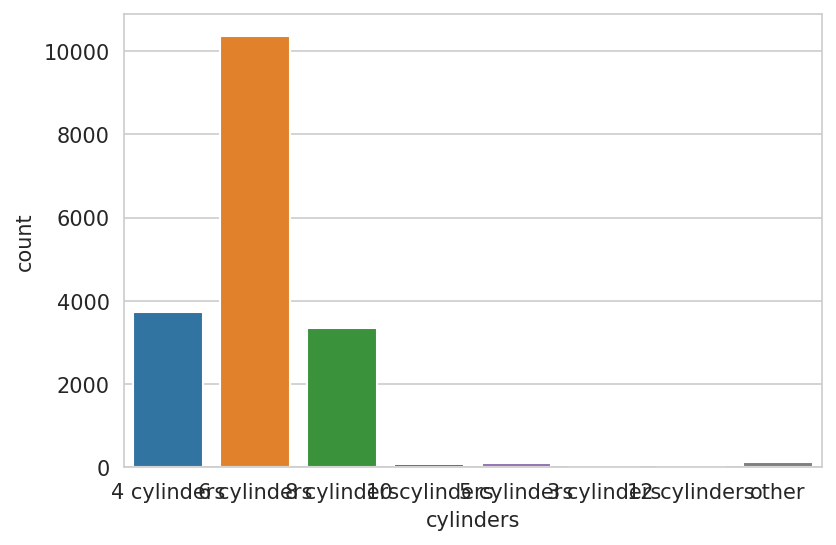

In [0]:
sns.countplot(x = 'cylinders', data = df)

In [0]:
# removing outliars

z = np.abs(stats.zscore(df['price']))
threshold = 3
z = np.where(z > 3)
print(z)

(array([ 3509, 16015]),)


In [0]:
df = df[df.price > z[0][0]]
# print(a)

**scaling**

In [0]:


# scaling the data with cleansing

data = df.filter(['year','long','lat'], axis=1)
scaler = StandardScaler() 
data.iloc[0:len(data),[0,1,2]] = scaler.fit_transform(data.iloc[0:len(data),[0,1,2]])

# scaling the data with non cleansing

ndata = ndf.filter(['year','lat','long'], axis=1)
scaler = StandardScaler() 
ndata.iloc[0:len(ndata),[0,1,2]] = scaler.fit_transform(ndata.iloc[0:len(ndata),[0,1,2]])

**printing to axel**

In [0]:
kuda = [1,2,3,3,4]
kuda = pd.DataFrame(kuda)

In [0]:
kuda.to_csv("data_clustering.csv", sep=';',index=True, encoding='utf-8')

# data.to_csv("data_clustering.csv", sep=';',index=True, encoding='utf-8')
# ndata.to_csv("ndata_clustering.csv", sep=';',index=True, encoding='utf-8')

# Clustering with cleansing dataset

In [0]:
from sklearn.metrics import silhouette_score

def euclideanDist(data, c):
    return(math.sqrt((data[0]-c[0])**2 + (data[1]-c[1])**2 + (data[2]-c[2])**2))

    
def getCenters(data,cluster,label):
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    cnt = cluster.count(label)
    for i in range(len(data)):
        if cluster[i] == label:
            sum_0 += data[i][0]
            sum_1 += data[i][1]
            sum_2 += data[i][2]
    
    return [sum_0/cnt, sum_1/cnt, sum_2/cnt]

new = data
new = new.values.tolist()

#inisial centroid
c1 = random.choice(new)
c2 = random.choice(new)
while c2 == c1:
    c2 = random.choice(new)
c3 = random.choice(new)
while c3 == c1 or c3 == c2:
    c3 = random.choice(new)

temp_c1 = []
temp_c2 = []
temp_c3 = []
while temp_c1 != c1 or temp_c2 != c2 or temp_c3 != c3:
    cluster = []
    fit10 = []
    fit11 = []
    fit12 = []
    fit20 = []
    fit21 = []
    fit22 = []
    fit30 = []
    fit31 = []
    fit32 = []
    
    for i in new:
        # GET EUCLIDEAN DISTANCE
        euc1 = euclideanDist(i, c1)
        euc2 = euclideanDist(i, c2)
        euc3 = euclideanDist(i, c3)
        
        #GET CLUSTER
        nearest = min(euc1, euc2, euc3)
        if nearest == euc1:
            cluster.append(1)
            fit10.append(i[0])
            fit11.append(i[1])
            fit12.append(i[2])
        elif nearest == euc2:
            cluster.append(2)
            fit20.append(i[0])
            fit21.append(i[1])
            fit22.append(i[2])
        else:
            cluster.append(3)
            fit30.append(i[0])
            fit31.append(i[1])
            fit32.append(i[2])
        
        
    # GET NEW CENTROID
    temp_c1 = copy.copy(c1)
    temp_c2 = copy.copy(c2)
    temp_c3 = copy.copy(c3)
    
    c1 = getCenters(new,cluster,1)
    c2 = getCenters(new,cluster,2)
    c3 = getCenters(new,cluster,3)

sil_score = silhouette_score(new,cluster)
sil_score

0.6569967925684062

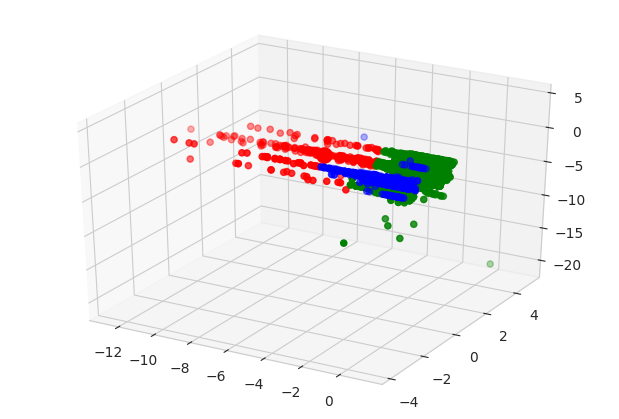

In [0]:

fig=plt.figure()
ax=Axes3D(fig)


ax.scatter(fit10,fit11,fit12,color='red')
ax.scatter(c1[0],c1[1],c1[2],color='red',marker='o',s=120)

ax.scatter(fit20,fit21,fit22,color='blue')
ax.scatter(c2[0],c2[1],c2[2],color='blue',marker='o',s=120)

ax.scatter(fit30,fit31,fit32,color='green')
ax.scatter(c3[0],c3[1],c3[2],color='green',marker='o',s=120)

plt.show()

# clustering wtih no cleansing

In [0]:
from sklearn.metrics import silhouette_score

def euclideanDist(data, c):
    return(math.sqrt((data[0]-c[0])**2 + (data[1]-c[1])**2 + (data[2]-c[2])**2))

    
def getCenters(data,cluster,label):
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    cnt = cluster.count(label)
    for i in range(len(data)):
        if cluster[i] == label:
            sum_0 += data[i][0]
            sum_1 += data[i][1]
            sum_2 += data[i][2]
    
    return [sum_0/cnt, sum_1/cnt, sum_2/cnt]

new = ndata
new = new.values.tolist()

#inisial centroid
c1 = random.choice(new)
c2 = random.choice(new)
while c2 == c1:
    c2 = random.choice(new)
c3 = random.choice(new)
while c3 == c1 or c3 == c2:
    c3 = random.choice(new)

temp_c1 = []
temp_c2 = []
temp_c3 = []
while temp_c1 != c1 or temp_c2 != c2 or temp_c3 != c3:
    cluster = []
    fit10 = []
    fit11 = []
    fit12 = []
    fit20 = []
    fit21 = []
    fit22 = []
    fit30 = []
    fit31 = []
    fit32 = []
    
    for i in new:
        # GET EUCLIDEAN DISTANCE
        euc1 = euclideanDist(i, c1)
        euc2 = euclideanDist(i, c2)
        euc3 = euclideanDist(i, c3)
        
        #GET CLUSTER
        nearest = min(euc1, euc2, euc3)
        if nearest == euc1:
            cluster.append(1)
            fit10.append(i[0])
            fit11.append(i[1])
            fit12.append(i[2])
        elif nearest == euc2:
            cluster.append(2)
            fit20.append(i[0])
            fit21.append(i[1])
            fit22.append(i[2])
        else:
            cluster.append(3)
            fit30.append(i[0])
            fit31.append(i[1])
            fit32.append(i[2])
        
        
    # GET NEW CENTROID
    temp_c1 = copy.copy(c1)
    temp_c2 = copy.copy(c2)
    temp_c3 = copy.copy(c3)
    
    c1 = getCenters(new,cluster,1)
    c2 = getCenters(new,cluster,2)
    c3 = getCenters(new,cluster,3)

nsil_score = silhouette_score(new,cluster)
nsil_score

0.7929476863638275

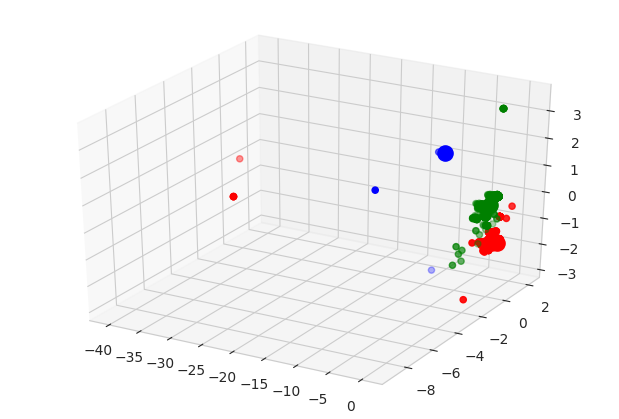

In [0]:

fig=plt.figure()
ax=Axes3D(fig)


ax.scatter(fit10,fit11,fit12,color='red')
ax.scatter(c1[0],c1[1],c1[2],color='red',marker='o',s=120)

ax.scatter(fit20,fit21,fit22,color='blue')
ax.scatter(c2[0],c2[1],c2[2],color='blue',marker='o',s=120)

ax.scatter(fit30,fit31,fit32,color='green')
ax.scatter(c3[0],c3[1],c3[2],color='green',marker='o',s=120)

plt.show()

# kesimpulan clustering

In [0]:
print("data with cleansing : ", sil_score)
print("data with no cleansing : ", nsil_score)

data with cleansing :  0.6569967925684062
data with no cleansing :  0.7929476863638275


# Classification

preprocess

In [0]:
dc = df.filter(['id','year','manufacturer', 'condition', 'cylinders', 'odometer', 'transmission', 'drive','price'], axis=1)

In [0]:
dc['price_bin']=pd.cut(x = dc['price'],
                        bins = [0,10000,60000,1172420099], 
                        labels = [1,2,3])
dc = dc.drop(['price'], axis=1)

In [0]:
dc['price_bin']

0        2
1        3
2        2
3        3
4        2
        ..
19996    2
19997    2
19998    3
19999    2
20000    2
Name: price_bin, Length: 17753, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [0]:
# Determination categorical features
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = dc.columns.values.tolist()
for col in features:
    if dc[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in dc.columns:
        le = LabelEncoder()
        le.fit(list(dc[col].astype(str).values))
        dc[col] = le.transform(list(dc[col].astype(str).values))

In [0]:
dc

,id,year,manufacturer,condition,cylinders,odometer,transmission,drive,price_bin
0,7034441763,2012.0,38,0,3,63500.0,1,0,1
1,7034440610,2016.0,12,0,5,10.0,0,0,2
2,7034440588,2015.0,13,0,5,7554.0,0,0,1
3,7034440546,2016.0,12,0,5,10.0,0,0,2
4,7034406932,2018.0,12,0,5,70150.0,0,0,1
...,...,...,...,...,...,...,...,...,...
19996,7049052853,2016.0,32,0,5,43406.0,0,0,1
19997,7049052797,2018.0,29,0,3,32867.0,0,1,1
19998,7049049369,2019.0,19,0,5,17514.0,0,0,2
19999,7049042761,2017.0,37,0,3,30486.0,0,1,1


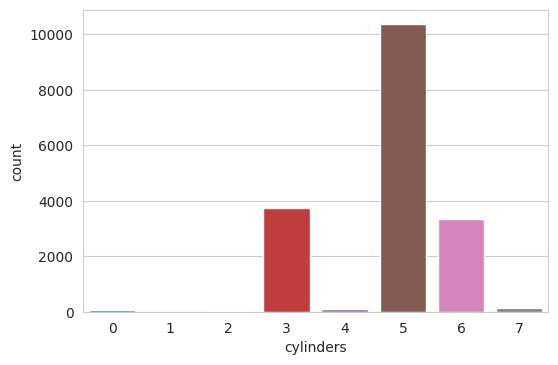

In [0]:
sns.countplot(x = 'cylinders', data = dc)

In [0]:
# scaling the data with cleansing

split = dc.filter(['year','manufacturer','condition','cylinders','odometer','transmission','drive'], axis=1)
scaler = StandardScaler() 
split.iloc[0:len(split),[0,1,2,3,4,5,6]] = scaler.fit_transform(split.iloc[0:len(split),[0,1,2,3,4,5,6]])

In [0]:
# ----------------------------------------------------------------
# with no cleansing

In [0]:
ndc = ndf.filter(['id','year','manufacturer', 'condition', 'cylinders', 'odometer', 'transmission', 'drive','price'], axis=1)

In [0]:
ndc['price_bin']=pd.cut(x = ndc['price'],
                        bins = [0,10000,60000,1172420099], 
                        labels = [1,2,3])
ndc = ndc.drop(['price'], axis=1)

In [0]:
# Determination categorical features
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = ndc.columns.values.tolist()
for col in features:
    if ndc[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in ndc.columns:
        le = LabelEncoder()
        le.fit(list(ndc[col].astype(str).values))
        ndc[col] = le.transform(list(ndc[col].astype(str).values))

In [0]:
# scaling the data with cleansing

nsplit = ndc.filter(['year','manufacturer','condition','cylinders','odometer','transmission','drive'], axis=1)
scaler = StandardScaler() 
nsplit.iloc[0:len(nsplit),[0,1,2,3,4,5,6]] = scaler.fit_transform(nsplit.iloc[0:len(nsplit),[0,1,2,3,4,5,6]])

**Printing to axel**

In [0]:
split.to_csv("data_classification.csv", sep=';',index=True, encoding='utf-8')
nsplit.to_csv("ndata_classification.csv", sep=';',index=True, encoding='utf-8')

# spltting data

In [0]:
x_train = split[:-2000]
y_train = dc['price_bin'][:-2000]

x_test = split[-2000:]
y_test = dc['price_bin'][-2000:]

In [0]:
x_train

,year,manufacturer,condition,cylinders,odometer,transmission,drive
0,0.159736,1.774886,-0.532356,-1.668748,-0.445900,2.008466,-0.673863
1,0.697939,-0.605716,-0.532356,0.233296,-1.420629,-0.324756,-0.673863
2,0.563388,-0.514154,-0.532356,0.233296,-1.304810,-0.324756,-0.673863
3,0.697939,-0.605716,-0.532356,0.233296,-1.420629,-0.324756,-0.673863
4,0.967041,-0.605716,-0.532356,0.233296,-0.343806,-0.324756,-0.673863
...,...,...,...,...,...,...,...
17848,0.563388,-0.331031,1.617533,-1.668748,-1.114408,2.008466,0.765392
17849,0.967041,0.126777,1.617533,-1.668748,-1.231225,-0.324756,0.765392
17850,0.832490,0.126777,1.617533,-1.668748,-1.269146,2.008466,0.765392
17851,0.025185,0.584585,1.617533,0.233296,-0.318030,-0.324756,2.204648


In [0]:
y_train

0        1
1        2
2        1
3        2
4        1
        ..
17848    1
17849    1
17850    1
17851    1
17852    1
Name: price_bin, Length: 15753, dtype: int64

In [0]:
# ---------------------------------------------------------
# with no cleansing

In [0]:
nx_train = nsplit[:-1000]
ny_train = ndc['price_bin'][:-1000]

nx_test = nsplit[-1000:]
ny_test = ndc['price_bin'][-1000:]

# masukan ke model

# Logistic regression

In [0]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(x_test)
print('Accuracy: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy: 0.82


In [0]:
# --------------------------------------------------------------
# no cleansing

In [0]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
nlogreg = LogisticRegression()
nlogreg.fit(nx_train, ny_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
ny_pred = nlogreg.predict(nx_test)
print('Accuracy: {:.2f}'.format(nlogreg.score(nx_test, ny_test)))

Accuracy: 0.70


# Naive bayes

In [0]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train.values.ravel())
y_pred = gnb.predict(x_test)

In [0]:
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.288


In [0]:
# --------------------------------------------------------------------
# with no cleansing

In [0]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

ngnb = GaussianNB()
ngnb.fit(nx_train, ny_train.values.ravel())
ny_pred = ngnb.predict(nx_test)

In [0]:
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(ny_test, ny_pred))

Accuracy : 0.245


# kesimpulan classification

In [0]:
print('logistic regression')
print('Accuracy with no cleansing: {:.2f}'.format(logreg.score(nx_test, ny_test)))
print('Accuracy with cleansing: {:.2f}'.format(logreg.score(x_test, y_test)))
print('-----------------------------------------')
print('-----------------------------------------')
print('naive bayes')
print("Accuracy with no cleansing :",metrics.accuracy_score(ny_test, ny_pred))
print("Accuracy with cleansing :",metrics.accuracy_score(y_test, y_pred))

logistic regression
Accuracy with no cleansing: 0.75
Accuracy with cleansing: 0.82
-----------------------------------------
-----------------------------------------
naive bayes
Accuracy with no cleansing : 0.245
Accuracy with cleansing : 0.288
